<a href="https://colab.research.google.com/github/rajtg19/AutoArima-Time-Series-Blog/blob/master/TimeSeries%20Test%20stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Train Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
train = pd.read_csv("/content/Electric_Production.csv")
train.shape

(397, 2)

In [10]:
train.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [12]:
train.rename(columns={'DATE':'date','IPG2211A2N':'production'}, inplace=True)
train.head()

,date,production
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


**Null Hypothesis:** Time Series is stationary. It gives a time-dependent trend. <br>
**Alternate Hypothesis:** Time Series is non-stationary. In other term, the series doesn’t depend on time.

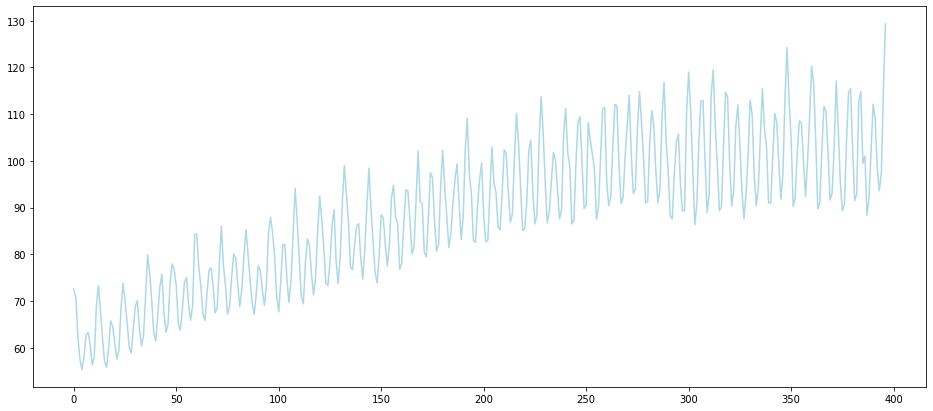

In [13]:
#Plot data 

plt.figure(figsize=(16,7));
plt.plot(train["production"],color="lightblue");

From the graph it is clear that the series is not stationary.
We will perform Dickyfuller test to statistically test it

In [15]:
#Augmentated Dicky Fuller Test

dfuller_results = adfuller(train.production)

dfuller_results

(-2.2569903500472273,
 0.1862146911658737,
 15,
 381,
 {'1%': -3.4476305904172904,
  '10%': -2.570827146203181,
  '5%': -2.869155980820355},
 1840.8474501627156)

In [17]:
print('ADF Statistic: %f' % dfuller_results[0])
print('p-value: %f' % dfuller_results[1])
print('Critical Values:')

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:


**ADF or t Statistic < critical values**: Accept the null hypothesis. Time series is stationary.<br>
**ADF or t Statistic > critical values**: Failed to reject the null hypothesis. The time series is non-stationary

In [16]:
for key, value in dfuller_results[4].items():
    print('\t%s: %.3f' % (key, value))

if dfuller_results[0] > dfuller_results[4]["5%"]:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")
else:
    print ("Reject Ho - Time Series is Stationary")

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Failed to Reject Ho - Time Series is Non-Stationary
